# Time – Series Data
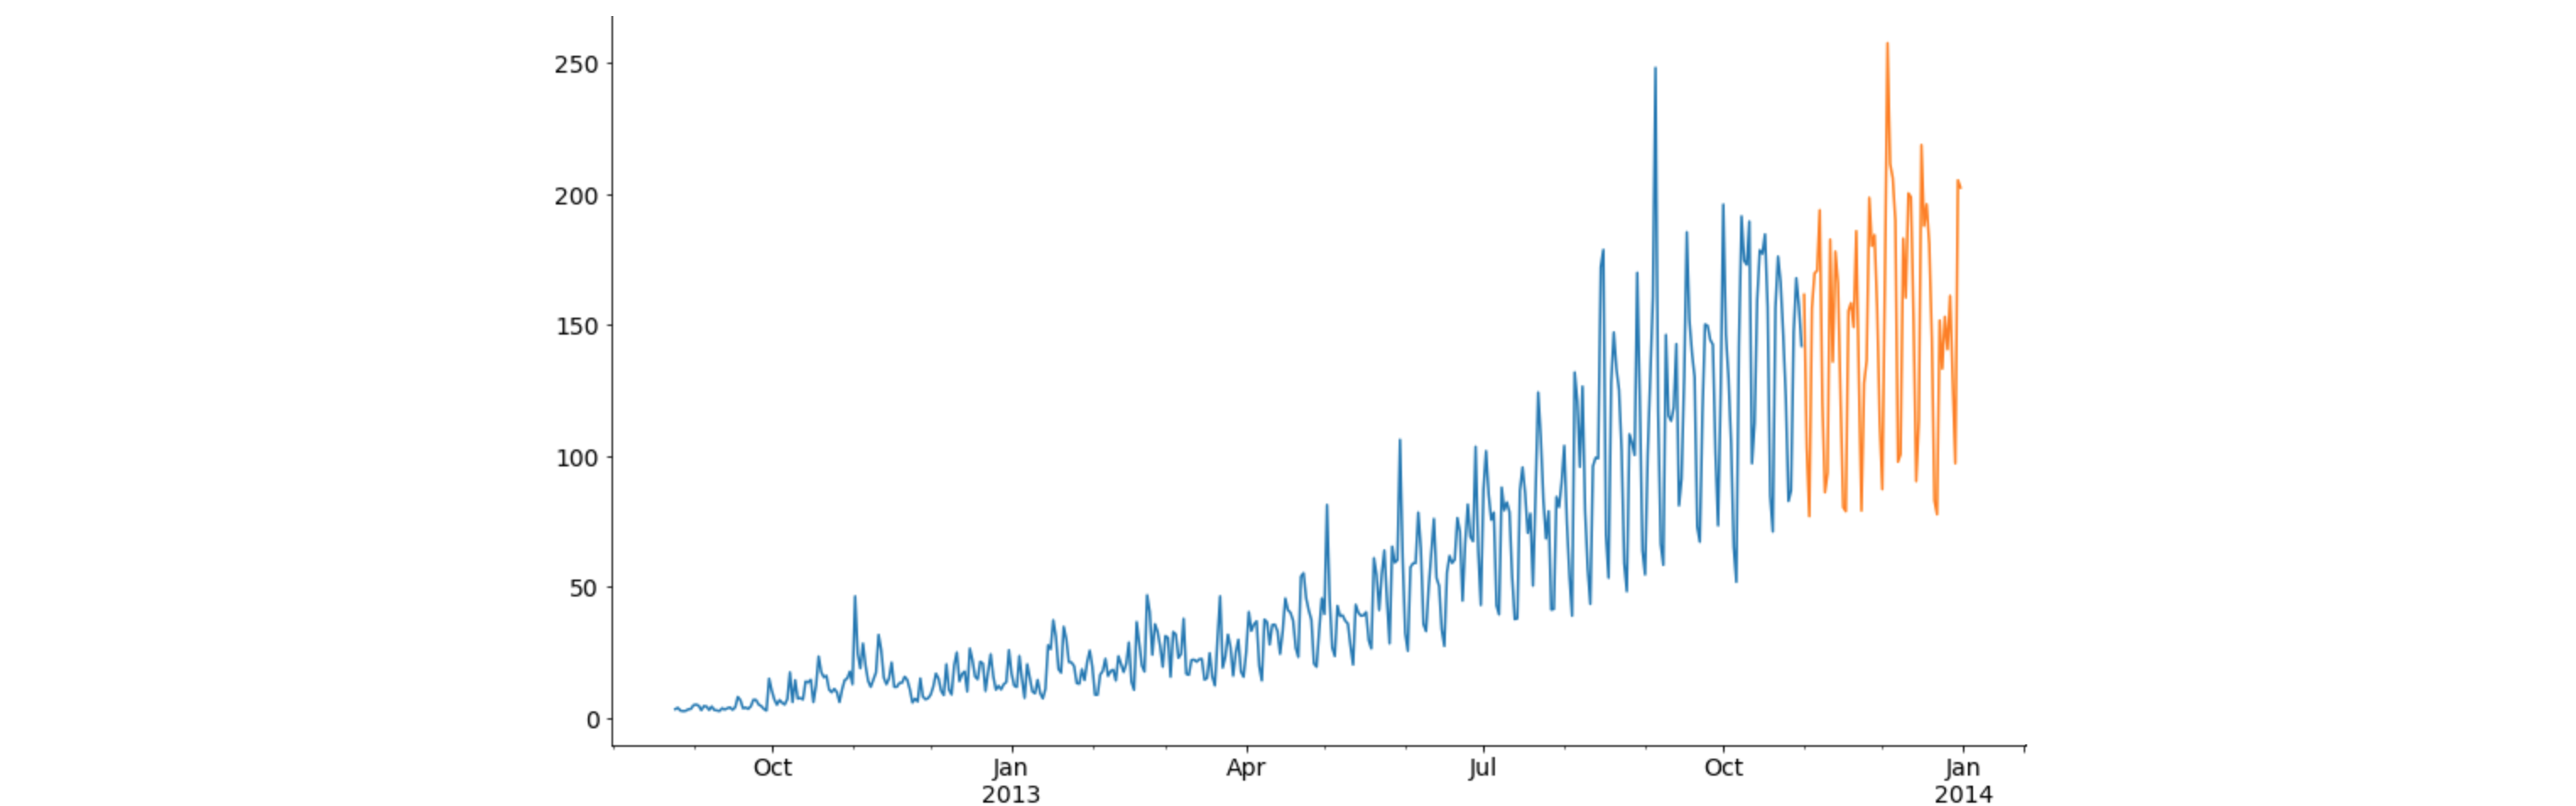

## Overview
<span style="font-size: 11pt; color: steelblue; font-weight: bold">**Time – Series data**</span> is an ordered sequence of observations, measurements, or data points taken at successive points in time. Each data point is associated with a specific time index or timestamp, which may be evenly or unevenly spaced.

<span style="font-size: 11pt; color: steelblue; font-weight: bold">**Time – Series data**</span> is a <span style="font-size: 11pt; color: steelblue; font-weight: bold">**critical and unique type of data**</span> in the context of **Machine Learning**. Time series data is prevalent in various domains, including finance, economics, environmental sciences, healthcare, manufacturing, and many others.

Next we will explore the key aspects of time Series – Data to gain insights into its patterns, trends and potential issues which should be avoided.

## Components of Time Series Data:
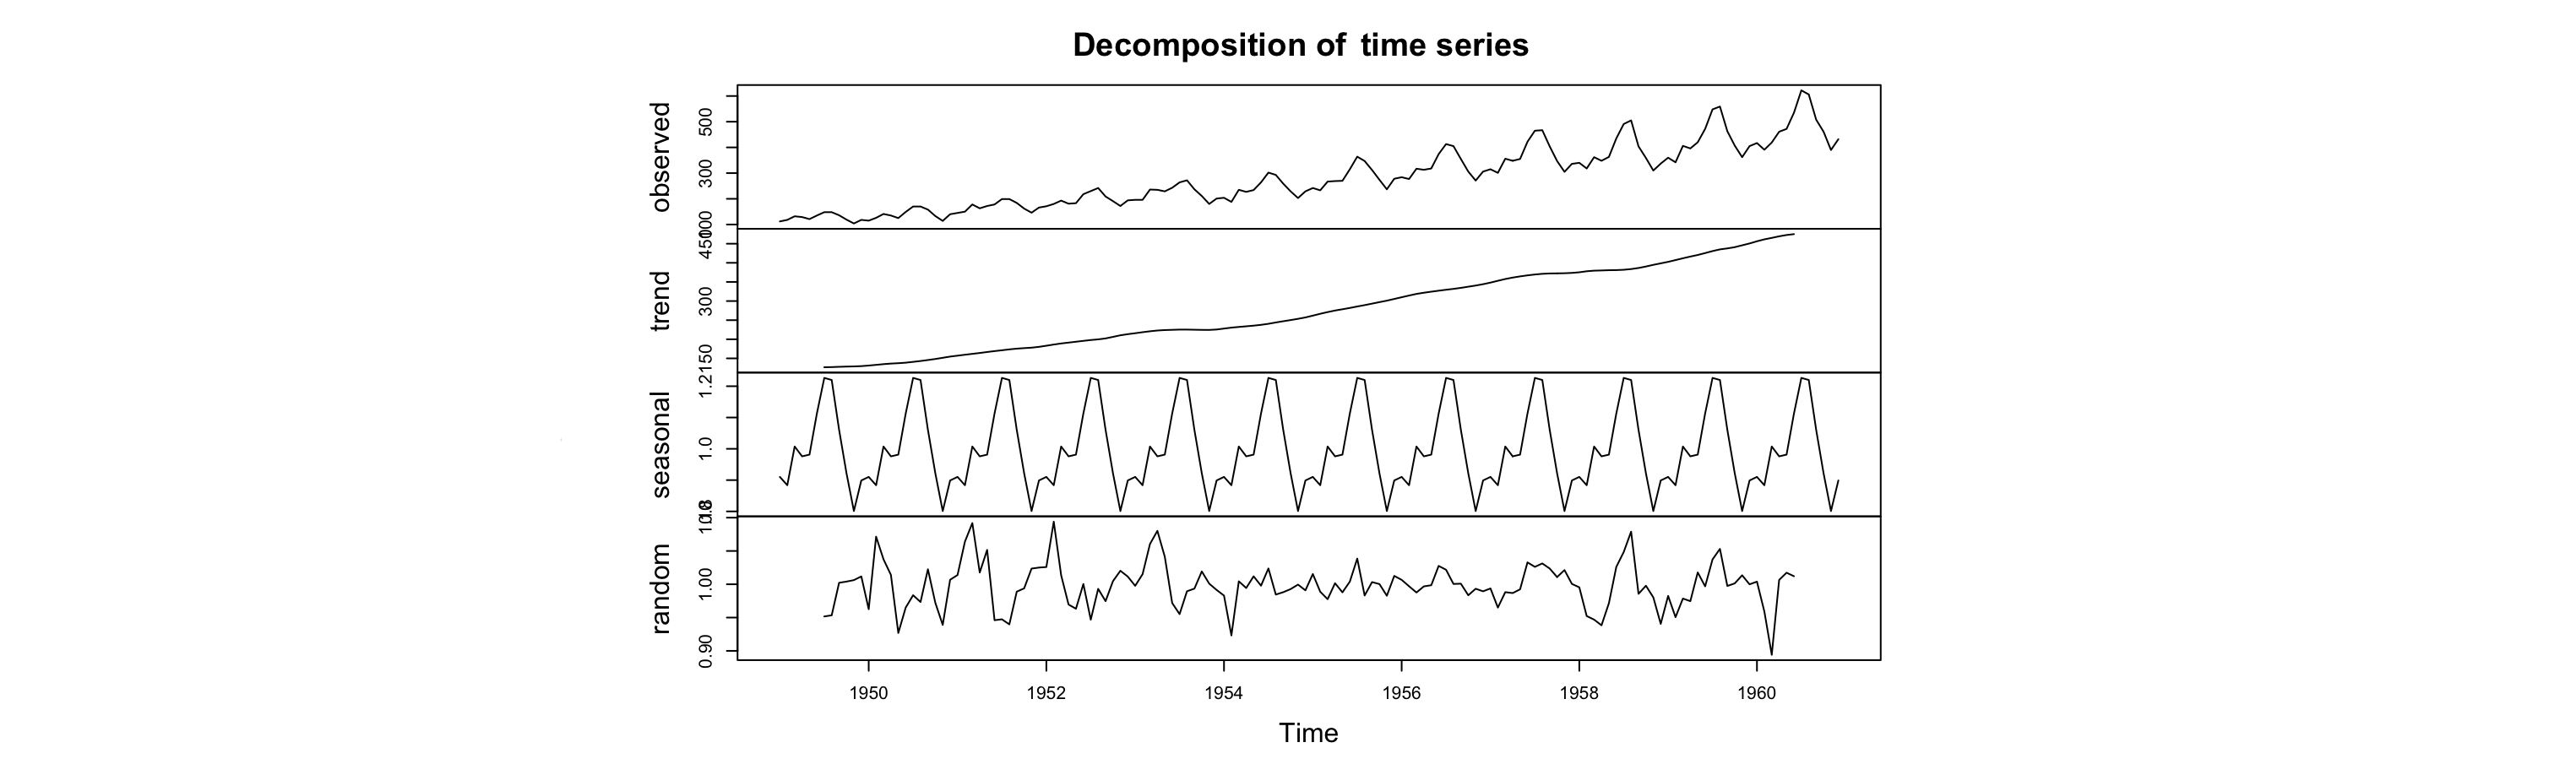
Time series data often exhibit certain components or patterns:

- <span style="font-size: 11pt; color: goldenrod; font-weight: bold">**Trend**</span>: The long-term movement or direction in the data, showing whether it is increasing, decreasing, or remaining relatively stable over time.
- <span style="font-size: 11pt; color: goldenrod; font-weight: bold">**Seasonality**</span>: Patterns that repeat at regular intervals, such as daily, weekly, or monthly cycles.
- <span style="font-size: 11pt; color: goldenrod; font-weight: bold">**Noise**</span>: Random fluctuations or irregularities that are not explained by the trend or seasonality and are usually considered as random noise.

Time – series data can be decompositioned into components with the help of `seasonal_decompose` from `statsmodels` library:
```python
from statsmodels.tsa.seasonal import seasonal_decompose

# perform the decomposition
decomposed_ts = seasonal_decompose(df['num_orders'])

# trend, seasonal and residual components
trend = decomposed.trend
seasonal = decomposed.seasonal
noise = decomposed.resid.plot
```

## Stationarity: 
Stationarity is a crucial concept in Time – Series. <span style="font-size: 11pt; color: mediumseagreen; font-weight: bold">**A time series is considered stationary if its statistical properties, such as mean, variance, and covariance, remain constant over time**</span>. <u>Time – Series data is often tested for Stationarity</u>, as <span style="font-size: 11pt; color: tomato; font-weight: bold">**non-stationary data can lead to unreliable predictions**</span>.

To determine whether a Time – Series is stationary, <u>unit root tests</u> are used. There are several kinds of unit root tests such as the **Augmented Dickey-Fuller** (ADF) test or the **Kwiatkowski-Phillips-Schmidt-Shin** (KPSS) test. These tests help assess the presence of a unit root (a non-stationary feature) in the data.

Augmented Dickey — Fuller test can be implemented with `adfuller` from `statsmodels` library:
```python
from statsmodels.tsa.stattools import adfuller

# ADF Test, significance level = 0.05

# H0 - time series data is non–stationary
# H1 - time series data is not non-stationary
ad_fuller_result = adfuller(data['num_orders'].dropna(0))

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

>>> ADF Statistic: -3.0689242890279558
>>> p-value: 0.028940051402612906
# p–value is less than significance level (0.05)
# reject the null hypothesis
```

## Rolling statistics
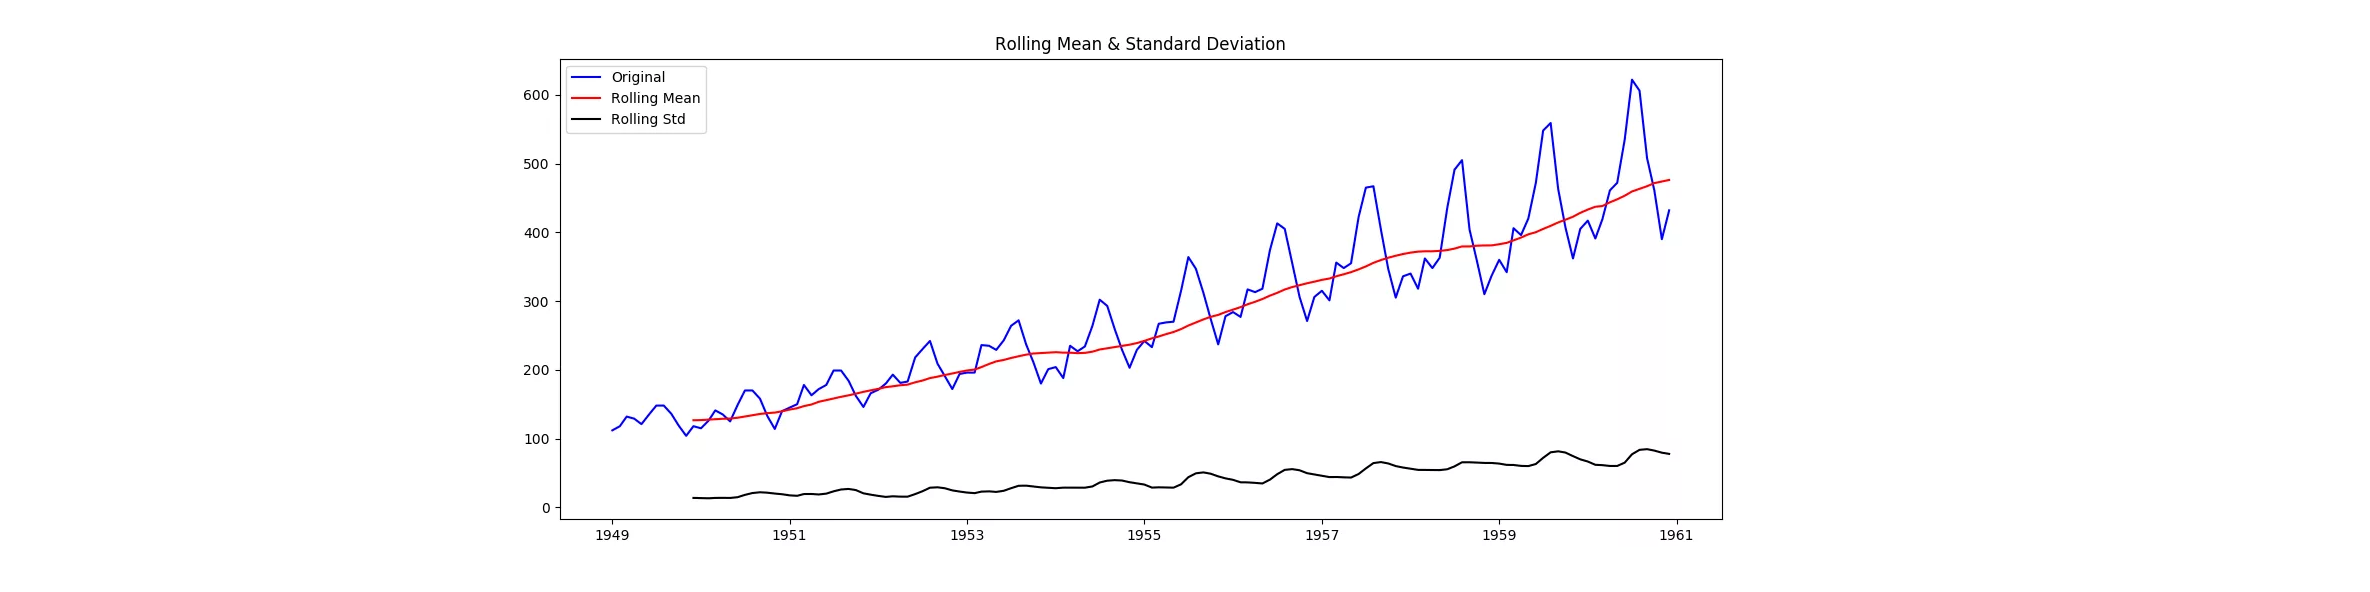

**Rolling statistics**, also known as rolling or moving averages, are a type of time series feature engineering technique that involves calculating statistics over a <u>sliding window of consecutive data points</u>. The window moves through the time series, and at each position, the statistic is computed for the data points within the window. This rolling process generates a new time series representing the moving average values.

It's important to note that **when computing rolling statistics**, the <span style="font-size: 11pt; color: orange; font-weight: bold">**size of the window or the number of data points included in each calculation is a crucial parameter**</span>. 
 - A smaller window size will result in more responsive rolling statistics, quickly capturing short-term variations, but may obscure long-term trends. 
 - Conversely, a larger window size will provide a smoother representation of the time series but may miss some finer details.

<span style="font-size: 11pt; color: mediumseagreen; font-weight: bold">**Computing rolling statistics in a rolling way is an effective technique to analyze time series data, identify patterns, and generate informative features for Machine Learning models**</span>. <u>By understanding the behavior of the time series over different time frames, we can make better-informed decisions and predictions</u>.

The most common rolling statistics include:

1. **Rolling Mean**: The average of the data points within the window.

2. **Rolling Median**: The median value of the data points within the window.

3. **Rolling Standard Deviation**: The standard deviation of the data points within the window.

4. **Rolling Sum**: The sum of the data points within the window.

#### Rolling statistics are computed in the rolling way for time series data for several reasons:

1. **Smoothing**: Rolling statistics help smooth out fluctuations and noise in the time series data. By taking an average or other statistical measure over a window of data, the effects of random fluctuations are reduced, making underlying patterns more apparent.

2. **Trend Detection**: Rolling statistics are useful for detecting trends in the data. If the rolling mean is increasing or decreasing over time, it indicates the presence of a trend.

3. **Seasonality Detection**: In seasonal data, rolling statistics can highlight the repeating patterns by providing insights into the cyclic behavior of the time series.

4. **Real-time Analysis**: Time series data is often collected incrementally, and new data points become available over time. By computing rolling statistics, you can continually update the information and gain insights into the latest behavior of the time series.

5. **Feature Engineering**: Rolling statistics are used as features in machine learning models for time series forecasting, anomaly detection, and other tasks. They can capture important temporal patterns and dependencies that contribute to the target variable's behavior.

6. **Handling Non-Stationarity**: Rolling statistics can help identify changes in the time series' statistical properties over time. Non-stationarity, where the mean, variance, or other statistical measures change over time, can be better understood and accounted for through rolling statistics.

7. **Data Visualization**: Rolling statistics are often plotted alongside the original time series to provide a smoother representation of the data, making it easier to observe trends and patterns visually.



## Feature Engineering for Time – Series:

**Feature engineering of Time – Series  data** is <span style="font-size: 11pt; color: goldenrod; font-weight: bold">**the process of creating relevant and informative features from the raw Time – Series to improve the performance of Machine Learning models**</span>.  

Effective feature engineering <u>can significantly enhance the model's ability to capture patterns, trends, and relationships within the time series data</u>.  

Some common feature engineering techniques for time series data include:

- **Lag features**: Using previous observations as features.

- **Rolling statistics**: Calculating statistics (mean, standard deviation, etc.) over a window of past observations.

- **Time-based features**: Extracting information like day of the week, month, or hour.
```python
# Example function to create (extract) additional features
# from Time – Series data
def make_features(data, max_lag, rolling_mean_size):
    
    # time-based features
    data['hour'] = data.index.hour 
    data['day'] = data.index.day   
    
    # lagged features
    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}h'] = data['num_orders'].shift(lag) 
        
    # rolling mean
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean() 
    return data
```
## Splitting time series data into training and validation/test sets:

Splitting Time – Series data into training and validation/test sets **requires careful consideration of the temporal order of the data** and <span style="font-size: 11pt; color: orange; font-weight: bold">**can be challenging**</span>.

Unlike random shuffling in traditional cross-validation, <span style="font-size: 11pt; color: mediumseagreen; font-weight: bold">**Time – Series data should be split sequentially**</span> <u>to preserve the temporal relationship between data points</u>. Here are two common approaches to splitting time series data for training and validation:

#### Time-Based Cross-Validation (Temporal Cross-Validation):

In time-based cross-validation, you set a specific cutoff point in the Time – Series to separate the training and validation/test sets. All data points before the cutoff are used for training, while those after the cutoff are used for validation/testing.

The main advantage of time-based cross-validation is that **it closely simulates how the model will be used in the real world** when it encounters new data after training.

Common time-based cross-validation techniques include:

- **Fixed Window Approach**: In this method, you define a fixed time window, such as six months or one year, and use data within this window as the training set. The next window (adjacent to the training window) is used as the validation/test set. This process is repeated until all data is used for validation.

- **Rolling Window Approach** (Walk-Forward Validation): In this approach, the training window moves forward in time step by step, and the validation window follows the training window. At each step, a model is trained on the data within the training window and evaluated on the data within the validation window.

#### Single Split based on Time:

Another approach is to set a specific time point to split the time series into training and validation/test sets. For example, we may use the first 70% or 80% of the data for training and the remaining 30% or 20% for validation/testing.

The key consideration in this approach is to ensure that the training data comes before the validation/test data, <u>preserving the temporal order</u>. This method is simpler to implement but may not fully capture how the model will perform in real-world scenarios where data continues to be collected over time.

When selecting the split point or the window size for cross-validation, it's important to consider factors such as the *dataset size*, the *time span covered by the data*, and the *length of the temporal dependencies* in the time series. In general, larger training windows provide more data for model training, but they may reduce the amount of data available for validation, potentially leading to less reliable evaluations.

<u>In situations where there is significant seasonality or periodicity in the data</u>, it's crucial to **ensure that the validation/test set includes complete cycles of the seasonality pattern**.

## Time – Series forecasting with Machine Learning:

In Time – Series forecasting with Machine Learning the goal is to <u>build models that can capture patterns, trends, and seasonalities in the data and extrapolate that knowledge to make accurate predictions</u>. 

Here's an overview of the process:

1. **Data Preparation**: The first step in time series forecasting is to gather and preprocess the data. This includes checking for missing values, handling outliers, and converting the data into a suitable format for modeling. Time series data usually consists of two columns: the timestamp and the corresponding values.

2. **Feature Engineering**: Feature engineering involves creating relevant features from the time series data to help improve the model's performance. Common techniques include creating lag features (using past observations as predictors), generating rolling statistics (e.g., moving averages), and extracting time-based features (e.g., day of the week, month, etc.).

3. **Data Splitting**: Unlike traditional machine learning tasks, time series data requires careful data splitting. The data should be split into a training set (historical data) and a validation or test set (future data) in a sequential manner, preserving the temporal order.

4. **Model Selection**: Several machine learning models can be used for time series forecasting, each with its strengths and weaknesses. 

Common models include:

   - **Autoregressive Integrated Moving Average (ARIMA)**: Suitable for univariate time series data, ARIMA models capture autoregressive and moving average components and can handle some levels of seasonality.

   - **Seasonal Autoregressive Integrated Moving-Average (SARIMA)**: An extension of ARIMA that accounts for seasonal components in the data.

   - **Exponential Smoothing (ETS)**: A family of models that use weighted averages to capture trends and seasonal patterns.

   - **Long Short-Term Memory (LSTM)**: A type of recurrent neural network (RNN) suitable for modeling sequences and capable of capturing long-term dependencies in the data.
   
   - **Gradient Boosting Models (e.g., XGBoost, LightGBM, CatBoost)**: These powerful ensemble models can be used for time series forecasting by transforming the time series data into a supervised learning problem.

5. **Model Training and Tuning**: The selected model is trained on the training data, and hyperparameters are tuned to optimize performance. Model evaluation is performed on the validation or test set to assess how well the model generalizes to unseen future data.

6. **Model Evaluation**: Various metrics can be used to evaluate the performance of the time series forecasting models, such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE).

7. **Model Deployment and Monitoring**: Once a satisfactory model is obtained, it can be deployed to make real-time predictions. Continuous monitoring of model performance is essential to ensure it remains accurate as new data becomes available.

8. **Handling Seasonality and Trends**: Time series forecasting models need to account for seasonality, trends, and other temporal patterns. Differencing, seasonal decomposition, and other techniques can help stabilize the mean and remove seasonality for better model performance.